<a href="https://colab.research.google.com/github/EMukami/Kazi_Mkononi/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [2]:
#zero dimensional tensor
zero_dim_tensor = tf.constant(20)
print(zero_dim_tensor)

#one dimensional tensor
one_dim_tensor = tf.constant([12, 20, 53, 26, 11, 56])
print(one_dim_tensor)

#two dimensional tensor
two_dim_array = [[3, 6, 7, 5], [9, 2, 3, 4], [7, 1, 10, 6], [0, 8, 11, 2]]

two_dim_tensor = tf.constant(two_dim_array)
print(two_dim_tensor)

tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

In [5]:
#load the CFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


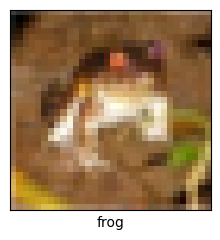

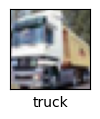

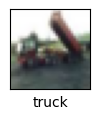

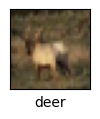

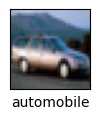

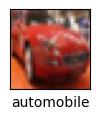

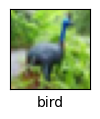

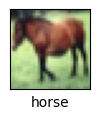

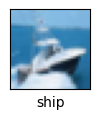

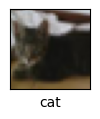

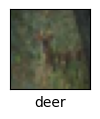

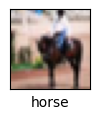

In [10]:
# 1. Functio for showing images
def show_images(train_images,
                class_names,
                train_labels,
                nb_samples = 12, nb_row = 4):

  plt.figure(figsize=(12, 12))
  for i in range(nb_samples):
      plt.subplot(nb_row, nb_row, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[train_labels[i][0]])
      plt.show()
#visualize some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)


In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Variable
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
from tensorflow.keras.metrics import Precision, Recall
BATCH_SIZE = 32
EPOCHS = 10

METRICS = metrics=['accuracy',
                   Precision(name='precision'),
                             Recall(name='recall')]
model.